In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

**Ingresos Netos y Brutos por cada Tienda**




In [32]:
#Junté las 4 tablas para poder analizarlas juntas
Tiendas_juan = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
], ignore_index=True)

Tiendas_juan.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [39]:
suma_por_tienda = Tiendas_juan.groupby('Tienda')['Precio'].sum()
print(suma_por_tienda.reset_index().rename(columns={'Precio': 'Ingresos Totales', 'Tienda': 'Tiendas Juan'}).to_string(index=False))

Tiendas Juan  Ingresos Totales
    Tienda 1      1150880400.0
    Tienda 2      1116343500.0
    Tienda 3      1098019600.0
    Tienda 4      1038375700.0


Los ingresos se encuentran en un rango de $1038375700.0 y $1150880400.0  Pesos, donde ingresa la mayor cantidad de Dinero en la Tienda #1 y la de menores ingresos se encuentrar en la Tienda # 4.

In [38]:
# Crear una nueva columna 'Precio Final' que reste el costo de envío al precio
Tiendas_juan['Precio Final'] = Tiendas_juan['Precio'] - Tiendas_juan['Costo de envío']

# ver ingreso neto de las tiendas
ingreso_neto = Tiendas_juan.groupby('Tienda')['Precio Final'].sum()
print(ingreso_neto.reset_index().rename(columns={'Precio': 'Ingresos netos ', 'Tienda': 'Tiendas Juan'}).to_string(index=False))

Tiendas Juan  Precio Final
    Tienda 1  1089502500.0
    Tienda 2  1056858400.0
    Tienda 3  1039503000.0
    Tienda 4   983058300.0


Los ingresos netos de las tiendas pone en evidencia el mismo comportamiento que con los ingresos Brutos.

**Analisis Cantidades vendidas por cada categoría**


In [12]:
## Vamos a hacer un conteo de cada producto vendido, segun la categoría

cantidad_ventas = Tiendas_juan.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index()

pivot_df = cantidad_ventas.pivot(index='Categoría del Producto', columns='Tienda', values='Producto').fillna(0)

print(pivot_df)

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


In [61]:
# Para cada tienda, obtener el top 5 de categorías más vendidas
top5_por_tienda = {}

for tienda in pivot_df.columns:
    top5 = pivot_df[tienda].sort_values(ascending=False).head(5)
    top5_por_tienda[tienda] = top5

# Mostrar los resultados
for tienda, top5 in top5_por_tienda.items():

    print(f"\nTop 5 categorías más vendidas en {tienda}:")

    print(top5)



Top 5 categorías más vendidas en Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Tienda 1, dtype: int64

Top 5 categorías más vendidas en Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Tienda 2, dtype: int64

Top 5 categorías más vendidas en Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Tienda 3, dtype: int64

Top 5 categorías más vendidas en Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Tienda 4, dtype: int64


Las principales categorias de venta de cada una de las tiendas  coinciden en las mismas, muebles, electronicos, juguetes, deportes y diversión, electrodomesticos.

# 3. Calificación promedio de la tienda

In [69]:
calificacion_promedio = Tiendas_juan.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio.columns = ['Tienda', 'Calificación Promedio']

calificacion_promedio


,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


La tienda con menor calificación promedio es la tienda #1, mientras que la de mayor calificacion en satisfacciuón es la tienda #3

La tienda 1 ha sido calificada mas veceses con la puntuación minima lo contrario a la tienda 2. mientras que la que ah tenido el mayor numeor de calififcaciones con la maxima es la tienda #3

In [76]:
satisfaccion_general = Tiendas_juan.groupby('Producto')['Calificación'].mean().reset_index()
satisfaccion_general.columns = ['Producto', 'Satisfacción General']

print(satisfaccion_general.sort_values(by='Satisfacción General', ascending=False).reset_index(drop=True))


                       Producto  Satisfacción General
0                     Impresora              4.239362
1                 Juego de mesa              4.217143
2                        Sillón              4.178571
3                  Refrigerador              4.162304
4     Iniciando en programación              4.133333
5                       Batería              4.133005
6       Bloques de construcción              4.110553
7                 Kit de bancas              4.106383
8             Ajedrez de madera              4.105556
9     Carrito de control remoto              4.097087
10              Olla de presión              4.081395
11      Dashboards con Power BI              4.071823
12                       Estufa              4.053476
13                Mesa de noche              4.052381
14               Dinosaurio Rex              4.051429
15                 Celular ABXY              4.050955
16              Sofá reclinable              4.049451
17              Mesa de come

la impreso, juegos de mesa y los sillones, son los que mejor calificación tienen, mientras que la menor puntuación promedio es para los set de vasos, modelado predicctivo y la mesa de centro.

#4. Productos más y menos vendidos

In [82]:
# Agrupar y contar productos vendidos por tienda
cantidad_ventas = Tiendas_juan.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Pivotear para tener productos como filas y tiendas como columnas
pivot_df = cantidad_ventas.pivot(index='Producto', columns='Tienda', values='Cantidad Vendida').fillna(0)

# Mostrar Top 5 y Bottom 5 por cada tienda
for tienda in pivot_df.columns:
    print(f"\n📈 Top 5 productos más vendidos en {tienda}:")
    print(pivot_df[tienda].sort_values(ascending=False).head(5))

    print(f"\n📉 Bottom 5 productos menos vendidos en {tienda}:")
    print(pivot_df[tienda].sort_values(ascending=True).head(5))



📈 Top 5 productos más vendidos en Tienda 1:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Tienda 1, dtype: int64

📉 Bottom 5 productos menos vendidos en Tienda 1:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Name: Tienda 1, dtype: int64

📈 Top 5 productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Tienda 2, dtype: int64

📉 Bottom 5 productos menos vendidos en Tienda 2:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
Name: Tienda 2, dtype: int64

📈 Top 5 productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama 

In [83]:
# Agrupar y contar productos vendidos en general (todas las tiendas)
ventas_generales = Tiendas_juan.groupby('Producto').size().reset_index(name='Cantidad Vendida')

# Ordenar de mayor a menor para obtener top y bottom
ventas_ordenadas = ventas_generales.sort_values(by='Cantidad Vendida', ascending=False).reset_index(drop=True)

# Mostrar Top 5 productos más vendidos en general
print("📈 Top 5 productos más vendidos en general:")
print(ventas_ordenadas.head(5))

# Mostrar Bottom 5 productos menos vendidos en general
print("\n📉 Bottom 5 productos menos vendidos en general:")
print(ventas_ordenadas.tail(5))


📈 Top 5 productos más vendidos en general:
                    Producto  Cantidad Vendida
0              Mesa de noche               210
1                 Microondas               206
2  Carrito de control remoto               206
3                    Batería               203
4                  Cama king               201

📉 Bottom 5 productos menos vendidos en general:
                       Producto  Cantidad Vendida
46  Ciencia de datos con Python               166
47           Guitarra eléctrica               165
48                      Mochila               163
49    Auriculares con micrófono               158
50                 Celular ABXY               157


#5. Envío promedio por tienda

In [85]:
# Costo de envío promedio por tienda
envio_promedio = Tiendas_juan.groupby('Tienda')['Costo de envío'].mean().reset_index()

# Renombrar columna para mayor claridad
envio_promedio.columns = ['Tienda', 'Costo Envío Promedio']

# Mostrar resultado
print(envio_promedio)


     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


In [107]:
# Costo de envío promedio por producto
envio_promedio_producto = Tiendas_juan.groupby('Producto')['Costo de envío'].mean().round(0).reset_index()

# Renombrar columna
envio_promedio_producto.columns = ['Producto', 'Costo Envío Promedio']

envio_promedio_producto=envio_promedio_producto.sort_values(by='Costo Envío Promedio', ascending=False).reset_index(drop=True)
# Mostrar resultado
print(envio_promedio_producto.head(5))
print("\n Menor costo de envío\n\n")

print(envio_promedio_producto.tail(5))


           Producto  Costo Envío Promedio
0     TV LED UHD 4K              123181.0
1         Iphone 15              108053.0
2      Refrigerador              107097.0
3          Smart TV               80421.0
4  Lavadora de ropa               73231.0

 Menor costo de envío


                   Producto  Costo Envío Promedio
46  Bloques de construcción                1655.0
47        Ajedrez de madera                1530.0
48           Dinosaurio Rex                1470.0
49       Cuerda para saltar                1420.0
50          Cubo mágico 8x8                1182.0


#VISUALIZACIONES

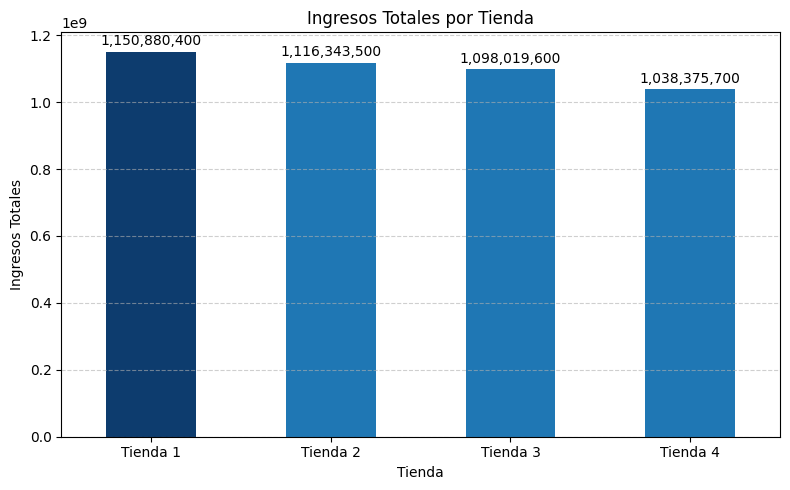

In [109]:
import matplotlib.pyplot as plt

# Obtener el valor máximo para resaltar
max_value = suma_por_tienda.max()
colors = ['#1f77b4' if value < max_value else '#0d3c6e' for value in suma_por_tienda]

# Crear gráfico de barras
ax = suma_por_tienda.plot(kind='bar', color=colors, figsize=(8, 5))

# Agregar etiquetas encima de las barras
for i, value in enumerate(suma_por_tienda):
    ax.text(i, value + value*0.01, f'{int(value):,}', ha='center', va='bottom', fontsize=10)

# Estética
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


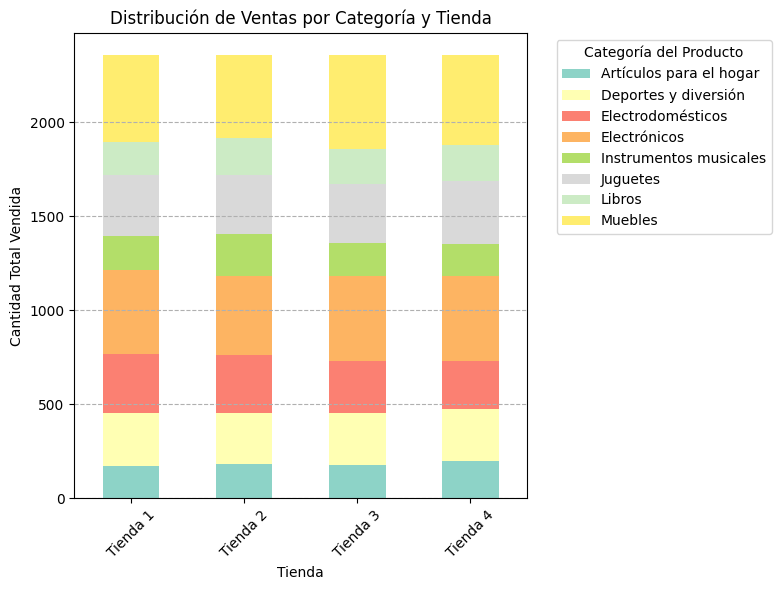

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar cantidad de productos vendidos por categoría y tienda
cantidad_ventas = Tiendas_juan.groupby(['Categoría del Producto', 'Tienda'])['Producto'].count().reset_index()

# Pivotar para obtener formato de tabla por categoría
pivot_df = cantidad_ventas.pivot(index='Tienda', columns='Categoría del Producto', values='Producto').fillna(0)

# Gráfico de barras apiladas
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set3')

plt.title('Distribución de Ventas por Categoría y Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(rotation=45)

# Leyenda a la derecha del gráfico
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


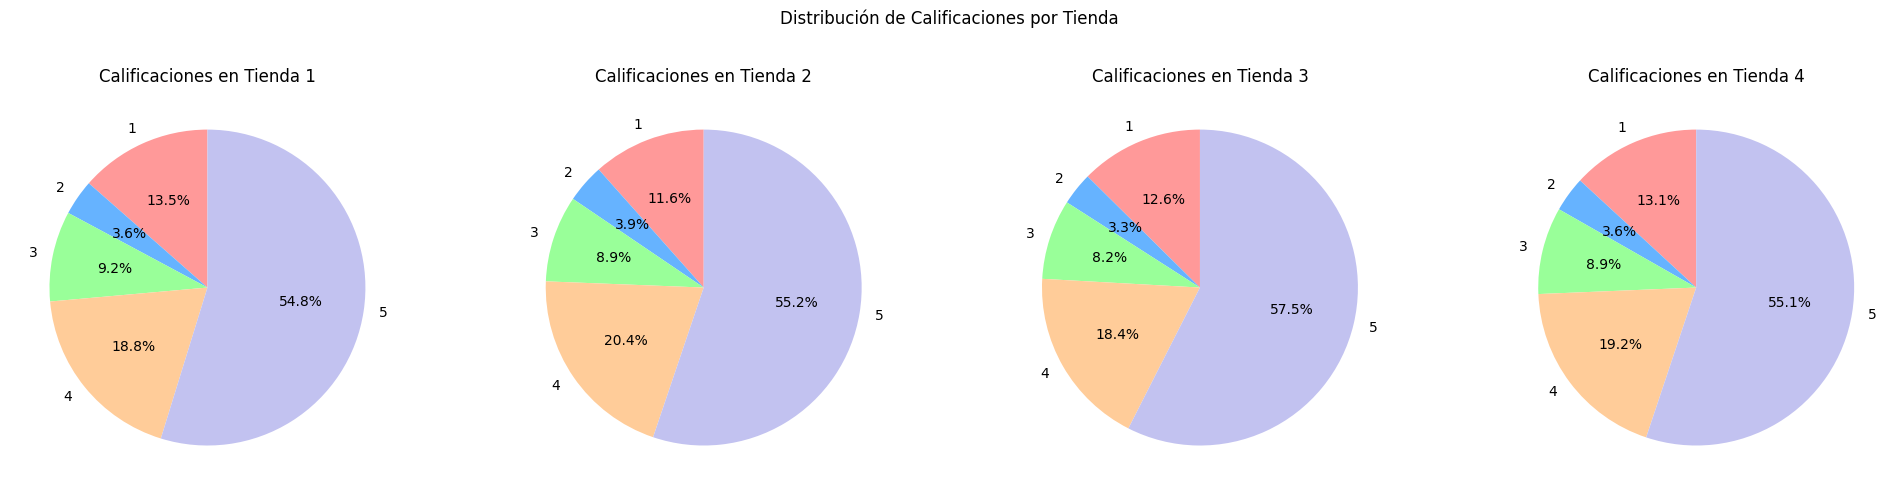

In [137]:
import matplotlib.pyplot as plt

# Obtener las tiendas únicas
tiendas = Tiendas_juan['Tienda'].unique()

# Configurar el tamaño de la figura según la cantidad de tiendas
fig, axes = plt.subplots(1, len(tiendas), figsize=(5 * len(tiendas), 5))

# Si solo hay una tienda, axes no es lista, lo convertimos en lista para iterar igual
if len(tiendas) == 1:
    axes = [axes]

# Colores para las calificaciones (1 a 5)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

for ax, tienda in zip(axes, tiendas):
    # Filtrar datos para la tienda
    data_tienda = Tiendas_juan[Tiendas_juan['Tienda'] == tienda]

    # Contar cantidad de calificaciones por valor
    counts = data_tienda['Calificación'].value_counts().sort_index()

    # Asegurar que todos los valores del 1 al 5 estén presentes (si no, poner 0)
    counts = counts.reindex(range(1,6), fill_value=0)

    # Graficar torta
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Calificaciones en {tienda}')

plt.suptitle('Distribución de Calificaciones por Tienda \n \n')
plt.tight_layout()
plt.show()


In [138]:
pip install plotly

In [149]:
import pandas as pd
import plotly.graph_objects as go

# Agrupar y contar productos vendidos por tienda
cantidad_ventas = Tiendas_juan.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Pivotear para tener productos como filas y tiendas como columnas
pivot_df = cantidad_ventas.pivot(index='Producto', columns='Tienda', values='Cantidad Vendida').fillna(0)

for tienda in pivot_df.columns:
    # Top 5 más vendidos (de mayor a menor)
    top5 = pivot_df[tienda].sort_values(ascending=False).head(5)

    # Bottom 5 menos vendidos (de menor a mayor), luego invertimos para que sea descendente en embudo
    bottom5 = pivot_df[tienda].sort_values(ascending=True).head(5).sort_values(ascending=False)

    # Concatenamos: primero los verdes (top5), luego los rojos (bottom5 ordenados descendente)
    funnel_data = pd.concat([top5, bottom5])

    # Colores: verde para top, rojo para bottom
    colors = ['green'] * 5 + ['red'] * 5

    fig = go.Figure(go.Funnel(
        y=funnel_data.index,
        x=funnel_data.values,
        textinfo="value+percent initial",
        marker={"color": colors}
    ))

    fig.update_layout(
        title=f" Top 5 en Ventas y menos vendidas  {tienda}",
        funnelmode="stack"
    )

    fig.show()


#Informe final


#Informe Final: Análisis de Desempeño y Recomendaciones para Tiendas del Sr. Juan
1. Propósito del análisis
El objetivo de este análisis es evaluar el desempeño comercial de las cuatro tiendas del Sr. Juan para identificar cuál es la más rentable, con mejor aceptación de los clientes y menor riesgo de pérdida en el mercado. Con base en los ingresos, satisfacción del cliente, volumen de ventas y costos de envío, se busca recomendar cuál tienda debería vender para optimizar su permanencia y competitividad en el mercado.

# Presentación de los datos
##Ingresos y ventas
La Tienda 1 genera el mayor ingreso bruto (entre $1,038,375,700 y $1,150,880,400 pesos), vendiendo productos más caros (TV UHD 4K, Iphone 15, Refrigeradores).

La Tienda 4 vende más cantidad en productos de menor costo (como camas, cubertería), y maneja envíos más económicos.

Las tiendas 2 y 3 tienen ingresos e índices de ventas intermedios.

# Satisfacción del cliente
La Tienda 3 tiene la mayor calificación promedio en satisfacción (4.048), con muchos clientes otorgando puntuaciones máximas.

La Tienda 1 presenta la menor satisfacción (3.976) y la mayor cantidad de calificaciones bajas.

Las tiendas 2 y 4 tienen satisfacción promedio cercana a 4.0.

# Productos clave y categorías
Las principales categorías de venta en todas las tiendas son: muebles, electrónicos, electrodomésticos, juguetes, deportes y diversión.

La Tienda 4 muestra diferencia en los productos menos vendidos respecto a las demás tiendas.

Top productos más vendidos globalmente incluyen: Mesa de noche, Microondas, Carrito de control remoto, Batería, Cama king.

# Costos de envío
La Tienda 1 tiene el costo de envío más alto.

La Tienda 4 tiene el costo de envío más bajo.

# Análisis y recomendaciones
3.1 Rentabilidad y posicionamiento
La Tienda 1 genera los mayores ingresos, pero tiene menor satisfacción y costos de envío altos, lo que puede afectar la fidelidad del cliente a largo plazo.

La Tienda 4, aunque genera menos ingresos, tiene mejor volumen en productos económicos, costos de envío bajos y mejor aceptación en ciertas categorías.

Tiendas 2 y 3 están en equilibrio en términos de ingresos y satisfacción.

3.2 Impacto de la satisfacción del cliente
La baja satisfacción en la Tienda 1 representa un riesgo de pérdida de clientes futuros, a pesar de su alto ingreso actual.

La Tienda 3 con alta satisfacción es un activo clave para mantener en el mercado, pues asegura lealtad y estabilidad.

3.3 Recomendación estratégica para la venta
Se recomienda vender la Tienda 1.
Justificación:

Aunque genera el mayor ingreso, su baja satisfacción y altos costos operativos (envío) hacen que sea menos sostenible en el largo plazo.

La Tienda 4, con su mejor aceptación en volumen y menor costo, puede mantener un flujo constante de ventas.

Tiendas 2 y 3 equilibran ingresos y satisfacción, por lo que mantenerlas asegura estabilidad.

# Conclusión

Si el Sr. Juan prioriza ingresos actuales, la Tienda 4 es la opción para vender.

Si prioriza la sostenibilidad, la fidelización y reducción de riesgos, debería vender la Tienda 1 y enfocarse en mantener las tiendas 2, 3 y 4.

Para el Sr. Juan es recomendable mantener las tiendas 2, 3 y 4 y proceder a la venta de la Tienda 1. La tienda 1 representa un riesgo por su baja satisfacción y costos altos, que a futuro podrían impactar negativamente la rentabilidad. Las otras tiendas ofrecen un equilibrio favorable entre ingresos, satisfacción y costos que permitirán al Sr. Juan mantenerse competitivo en el mercado y con clientes más satisfechos.